In [2]:
import math
import time
import timeit
import typing

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.special import lambertw


#zadanie 2

W tym zadaniu sprawdzimy poprawność poznanych metod generowania rozkładu normalnego:
- Boxa-Mullera
- Marsaglia
- akceptacji i odrzucenia
- odwrotnej dystrybuanty

Następnie zaimplementujemy dwie nowe metody:
- tuzina
-zigguratu

Oraz porównamy efektywność wszytskich metod.

### Metoda Boxa-Mullera
Generuje pary niezależnych próbek z rozkładu normalnego, używając dwóch liczb losowych i przekształcając je za pomocą funkcji trygonometrycznych.



In [3]:
def generate_box_muller_samples(n: int) -> np.ndarray:
    """
    Generate pairs of independent standard normally distributed random samples
    using the Box-Muller transform.

    Args:
        n (int): Number of pairs of samples to generate.

    Returns:
        np.ndarray: Array containing pairs of samples from N(0, 1).

    Example:
        >>> samples = generate_box_muller_samples(5)
        [[ 0.67651333 -1.57478532]
         [ 0.91721221  0.98222932]
         [-0.06063317  1.69096695]
         [ 1.95037048  0.39793897]
         [ 0.95493449  0.71561376]]

    """
    u1, u2 = np.random.uniform(0, 1, n), np.random.uniform(0, 1, n)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return np.column_stack((z1, z2))

# Example of generating 500 pairs of samples
samples = generate_box_muller_samples(500)
print(samples[:10])



[[ 0.30489078 -0.4578702 ]
 [-1.04257342  2.93999516]
 [-0.18372899 -1.26128787]
 [ 0.35153382  0.39246126]
 [-1.13524973 -0.41060638]
 [-1.26797575 -0.32085917]
 [ 0.96462399 -1.01003238]
 [-0.14225825 -0.31409087]
 [-1.80295856 -1.12671523]
 [ 0.31935345  2.38335917]]


## Metoda Marsaglia
Generuje pary niezależnych próbek z rozkładu normalnego, przekształcając liczby losowe wewnątrz jednostkowego koła.

In [4]:
def generate_marsaglia_samples(n: int) -> np.ndarray:
    """
    Generate pairs of independent standard normally distributed random samples
    using the Marsaglia polar method.

    Args:
        n (int): Number of pairs of samples to generate.

    Returns:
        np.ndarray: Array containing pairs of samples from N(0, 1).

    Example:
        >>> samples = generate_marsaglia_samples(5)
        [[ 0.68359172  0.23154912]
         [ 0.17656907 -0.42035047]
         [-0.17585705 -0.59222521]
         [-1.07930007  1.4762214 ]
         [-0.70901591  2.24802946]]
    """
    samples = []
    while len(samples) < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        if u1**2 + u2**2 >= 1 or u1**2 + u2**2 == 0:
            continue
        samples.append([u1 * np.sqrt(-2 * np.log(u1**2 + u2**2) / (u1**2 + u2**2)), u2 * np.sqrt(-2 * np.log(u1**2 + u2**2) / (u1**2 + u2**2))])
    return np.array(samples)

# Example of generating 500 pairs of samples
samples = generate_marsaglia_samples(500)
print(samples[:10])




[[-0.16010543 -0.17251516]
 [ 0.75782567 -0.47913935]
 [ 1.1371004  -0.60162493]
 [ 0.4124093  -1.24966637]
 [-0.03573507  0.92632716]
 [ 0.28873545 -0.80209609]
 [ 0.90938189  2.18402124]
 [ 1.22277938 -0.94287546]
 [-1.41628742  1.16027297]
 [-0.61689491 -0.9901221 ]]


## Metoda akceptacji i odrzucenia
Generuje próbki akceptując je z prawdopodobieństwem proporcjonalnym do stosunku rozkładu docelowego.

In [5]:
def generate_rejection_sampling_samples(n: int) -> np.ndarray:
    """
    Generate samples from a standard normal distribution using the rejection sampling method.

    Args:
        n (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of generated samples from N(0, 1).

    Example:
        >>> samples = generate_rejection_sampling_samples(5)
        [-0.55048198  0.39625529  0.21990762 -2.09609915 -1.89801697]
    """
    samples = []
    while len(samples) < n:
        if np.random.uniform(0, np.exp(-0.5 * np.random.normal(0, 1)**2)) <= np.exp(-0.5 * np.random.normal(0, 1)**2):
            samples.append(np.random.normal(0, 1))
    return np.array(samples)

samples = generate_rejection_sampling_samples(1000)
print(samples[:10])

[ 3.00573335  0.39736404  0.21059168 -0.08729859  0.7961365   0.89971574
 -1.20101358 -0.68160478  0.43772146  0.16752852]


## Metoda odwrotnej dystrybuanty
Przekształca jednolicie rozłożone próbki losowe na próbki z pożądanego rozkładu, stosując odwrotność dystrybuanty tego rozkładu.

In [6]:
def inverse_transform_sampling(n: int) -> np.ndarray:
    """
    Generate samples from a standard normal distribution using the inverse transform sampling method.
    This method transforms uniformly distributed samples into samples that follow a specified distribution,
    in this case, the standard normal distribution.

    Args:
        n (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of samples from the standard normal distribution.

    Example:
        >>> samples = inverse_transform_sampling(5)
        [-0.17954508  1.61551912  1.70476921 -0.20355527  0.41360926]
    """
    # Generate uniform samples from 0 to 1
    uniform_samples = np.random.uniform(0, 1, n)
    # Transform these uniform samples to standard normal samples using the PPF (Percent Point Function)
    return stats.norm.ppf(uniform_samples)

samples = inverse_transform_sampling(1000)
print(samples[:10])

[ 0.77855178 -1.48187343 -1.98947925 -1.51192322 -1.33419132  1.62376259
  0.88368905 -0.61416406 -0.16334197 -1.09044146]


## Sprawdzenie poprawności dotychczas zaimplementowanych algorytmów
Poprzez porównanie gęstości empirycznych i teoretycznych

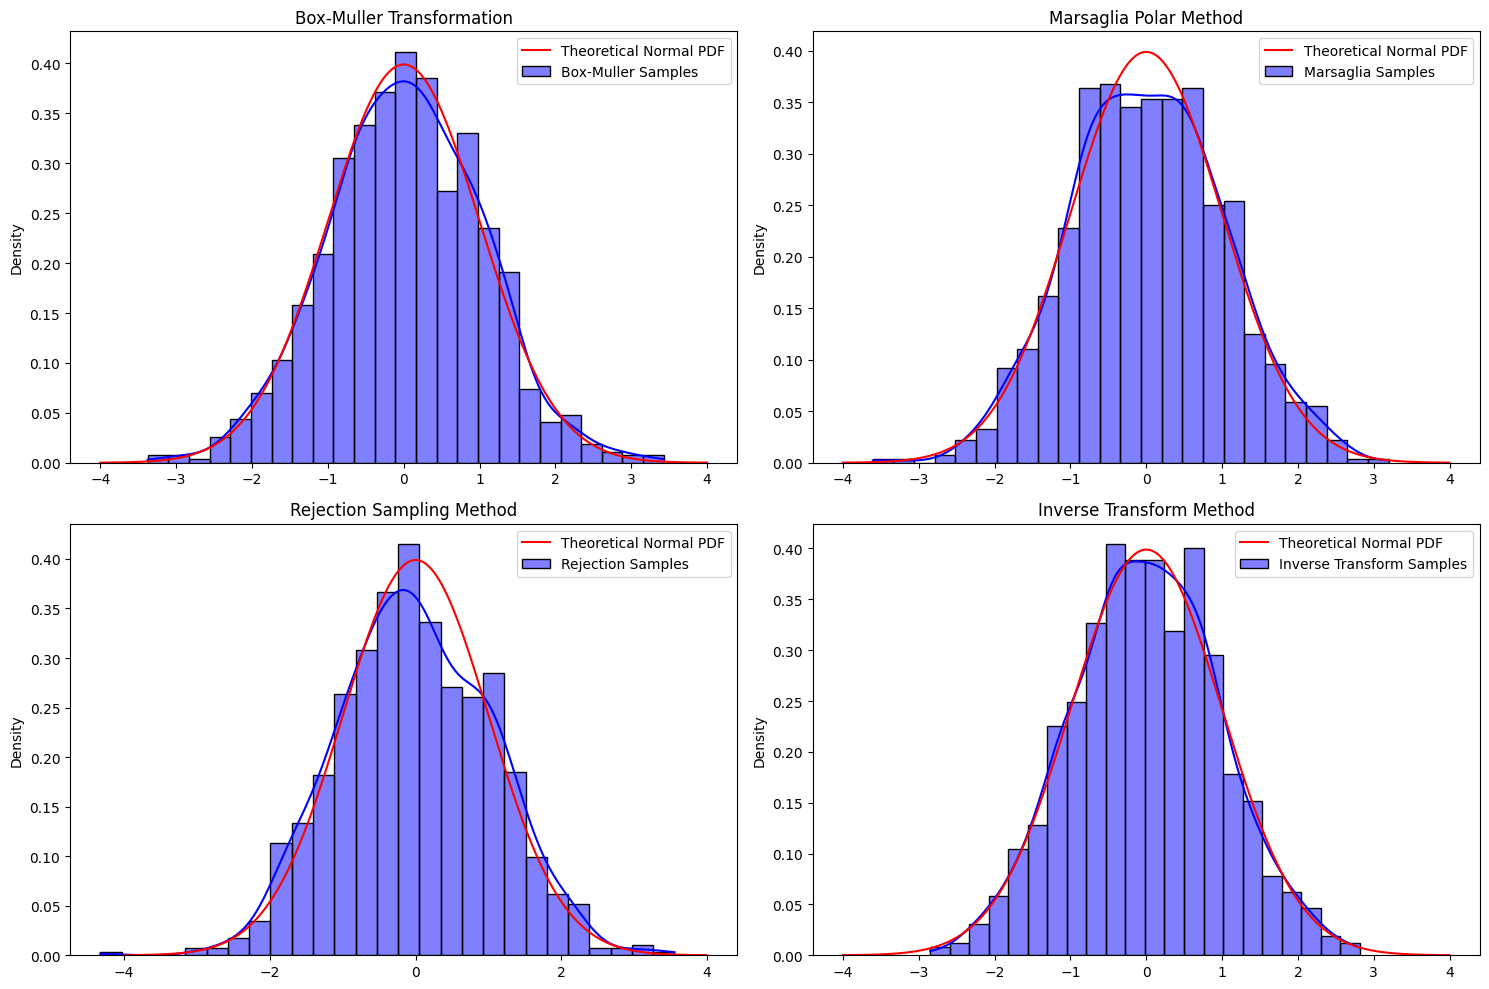

In [7]:
def plot_distributions(n: int =1000):
    """
    Plot histograms and theoretical normal density of the samples generated using different methods.

    Args:
        n (int): Number of samples to plot for each method.

    Example:
        >>> plot_distributions(1000)
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Box-Muller
    samples = generate_box_muller_samples(n)[:, 0]
    sns.histplot(samples, stat='density', kde=True, label='Box-Muller Samples', color='blue', ax=axs[0, 0])
    x_range = np.linspace(-4, 4, 1000)
    theoretical_pdf = stats.norm.pdf(x_range, 0, 1)
    axs[0, 0].plot(x_range, theoretical_pdf, 'red', label='Theoretical Normal PDF')
    axs[0, 0].set_title('Box-Muller Transformation')
    axs[0, 0].legend()


    # Marsaglia
    samples = generate_marsaglia_samples(n)[:, 0]
    sns.histplot(samples, stat='density', kde=True, label='Marsaglia Samples', color='blue', ax=axs[0, 1])
    x_range = np.linspace(-4, 4, 1000)
    theoretical_pdf = stats.norm.pdf(x_range, 0, 1)
    axs[0, 1].plot(x_range, theoretical_pdf, 'red', label='Theoretical Normal PDF')
    axs[0, 1].set_title('Marsaglia Polar Method')
    axs[0, 1].legend()


    # Rejection sampling
    samples = generate_rejection_sampling_samples(n)
    sns.histplot(samples, stat='density', kde=True, label='Rejection Samples', color='blue', ax=axs[1, 0])
    x_range = np.linspace(-4, 4, 1000)
    theoretical_pdf = stats.norm.pdf(x_range, 0, 1)
    axs[1, 0].plot(x_range, theoretical_pdf, 'red', label='Theoretical Normal PDF')
    axs[1, 0].set_title('Rejection Sampling Method')
    axs[1, 0].legend()


    # Inverse transform
    samples = inverse_transform_sampling(n)
    sns.histplot(samples, stat='density', kde=True, label='Inverse Transform Samples', color='blue', ax=axs[1, 1])
    x_range = np.linspace(-4, 4, 1000)
    theoretical_pdf = stats.norm.pdf(x_range, 0, 1)
    axs[1, 1].plot(x_range, theoretical_pdf, 'red', label='Theoretical Normal PDF')
    axs[1, 1].set_title('Inverse Transform Method')
    axs[1, 1].legend()


    plt.tight_layout()
    plt.show()

# Plot all distributions
plot_distributions()


### Wnioski
Wszystkie cztery metody generują próbki, które dobrze pasują do teoretycznego rozkładu normalnego, co jest widoczne na histogramach. Możemy założyć że te metody poprawnie generują rozkład naturalny.

## Metoda Tuzina
Generuje próbki z rozkładu normalnego, sumując dwanaście jednolicie rozłożonych liczb losowych i odejmując od sumy 6, co daje aproksymację rozkładu normalnego.

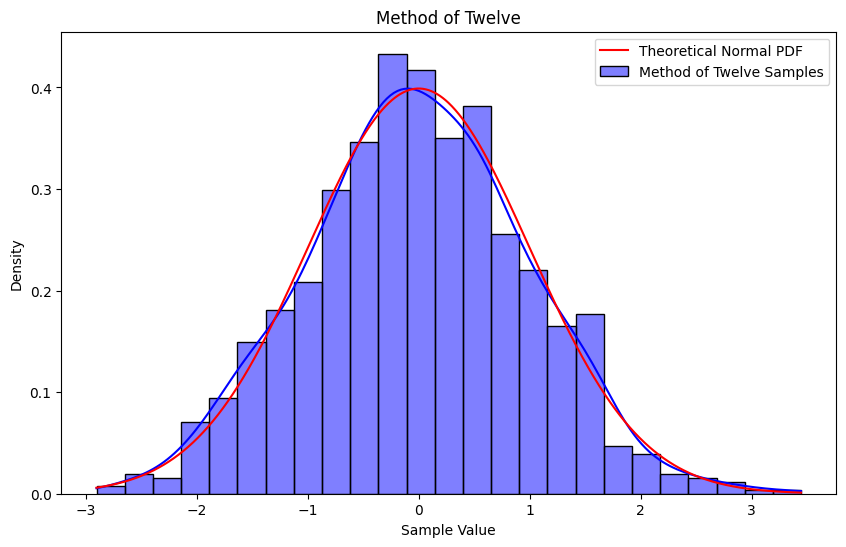

In [8]:
def method_of_twelve(n: int) -> np.ndarray:
    """
    Generate samples from an approximately normal distribution using the method of twelve.
    This method sums twelve uniformly distributed random variables to approximate a normal distribution.

    Args:
        n (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of samples approximately from N(0, 1).

    Example:
        >>> samples = method_of_twelve(5)
        [-0.62345008 -0.75233293 -0.04262207  0.04390864  0.23887243]
    """
    # Sum twelve uniform distributions and adjust to mean 0, variance 1
    # Adjust the mean
    return np.array([sum(np.random.uniform(0, 1, 12)) for _ in range(n)]) - 6



def plot_distribution_method_of_twelve(n: int =1000):
    """
    Plot histogram and theoretical normal density of the samples generated using the method of twelve.

    Args:
        n (int): Number of samples to visualize.

    Example:
        >>> plot_distribution_method_of_twelve(1000)
    """
    samples = method_of_twelve(n)
    plt.figure(figsize=(10, 6))
    sns.histplot(samples, stat='density', kde=True, label='Method of Twelve Samples', color='blue')
    x_range = np.linspace(min(samples), max(samples), 1000)
    theoretical_pdf = stats.norm.pdf(x_range, 0, 1)
    plt.plot(x_range, theoretical_pdf, 'red', label='Theoretical Normal PDF')

    plt.xlabel('Sample Value')
    plt.ylabel('Density')
    plt.title('Method of Twelve')
    plt.legend()
    plt.show()

# Example of generating and plotting using the method of twelve
plot_distribution_method_of_twelve(1000)


Metoda tuzina generuje próbki, które dobrze pasują do teoretycznego rozkładu normalnego, co jest widoczne na histogramie.

## Metoda Ziggurat
Generuje próbki z rozkładu normalnego, dzieląc rozkład na wiele warstw (zigguratów) i wykorzystując wcześniej obliczone tabele do próbkowania z każdej warstwy.

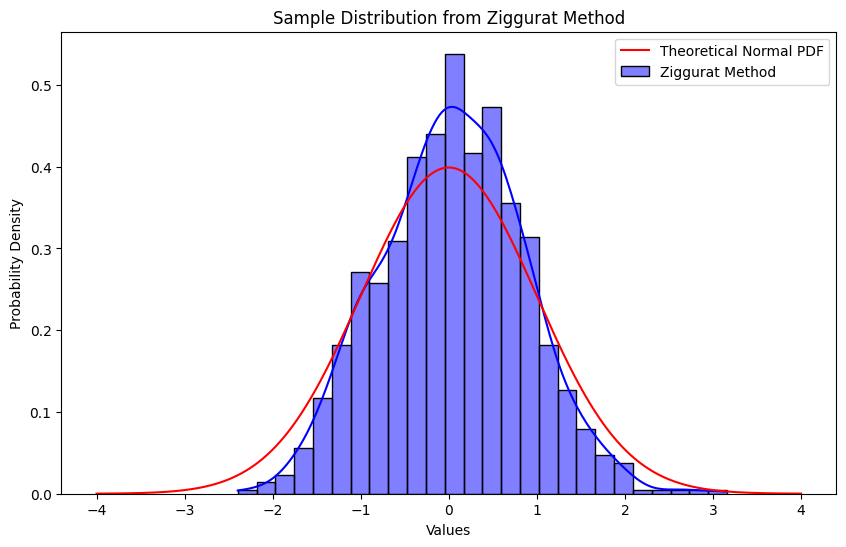

In [9]:
def generate_ziggurat_samples(n: int) -> np.ndarray:
    """
    Generate samples from a normal distribution using the Ziggurat method.

    Args:
        n (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of samples from N(0, 1).

    Example:
        >>> samples = generate_ziggurat_samples(5)
        [ 0.92774221 -0.35528179  0.09780095 -0.82148959 -0.0458996 ]
    """
    ZIGGURAT_R = 3.442619855899 # Constant defining the boundary of the central region of the normal distribution
    ZIGGURAT_V = 9.91256303526217e-3 # Constant defining the value specified by the Ziggurat curve at the point ZIGGURAT_R

    # Initialize arrays for x and y coordinates of the Ziggurat levels
    x = np.zeros(128)
    y = np.zeros(128)
    x[0] = ZIGGURAT_R # Set first level
    y[0] = ZIGGURAT_V / np.exp(-0.5 * ZIGGURAT_R ** 2) # Calculate first level

    # Fill the x and y arrays for levels 1 to 126
    for i in range(1, 127):
        x[i] = np.sqrt(-2 * np.log(ZIGGURAT_V / x[i - 1] + np.exp(-0.5 * x[i - 1] ** 2)))
        y[i] = ZIGGURAT_V / np.exp(-0.5 * x[i] ** 2) # Calculate values for level i
    x[127] = 0.0 # Set the end value of x array

    # Initialize array for storing samples
    samples = np.zeros(n)
    for i in range(n):
        while True:
            u = 2 * np.random.uniform() - 1
            j = np.random.randint(0, 128) # Select level
            sample = u * x[j]
            if np.abs(u) < y[j]: # Acceptance condition
                samples[i] = sample
                break
            if j == 0: # Special case for level 0
                while True:
                    x_val = -np.log(np.random.uniform()) / ZIGGURAT_R
                    y_val = -np.log(np.random.uniform())
                    if y_val + y_val > x_val * x_val: # Check the tail condition
                        sample = -ZIGGURAT_R - x_val if u < 0 else ZIGGURAT_R + x_val
                        samples[i] = sample
                        break
                break
            elif y[j] + np.random.uniform() * (y[j - 1] - y[j]) < np.exp(-0.5 * x[j] * x[j]): # Additional acceptance condition
                samples[i] = sample
                break
    return samples


def plot_distribution_ziggurat(n: int = 1000):
    """
    Plot histogram and theoretical normal density of the samples generated using the Ziggurat method.

    Args:
        n (int): Number of samples to visualize.

    Example:
        >>> plot_distribution_ziggurat(1000)
    """
    samples = generate_ziggurat_samples(n)
    plt.figure(figsize=(10, 6))
    sns.histplot(samples, stat='density', kde=True, label='Ziggurat Method', color='blue')
    #plt.hist(samples, bins=30, density=True, alpha=0.75, color='blue', label='Ziggurat Samples')
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, stats.norm.pdf(x), 'r-', label='Theoretical Normal PDF')
    plt.xlabel('Values')
    plt.ylabel('Probability Density')
    plt.title('Sample Distribution from Ziggurat Method')
    plt.legend()
    plt.show()

# Example of generating and plotting using the Ziggurat method
plot_distribution_ziggurat(1000)


Metoda zigguratu generuje próbki, które przypominają teoretyczny rozkład normalny, co możemy odczytać z histogramu.

## Porównanie czasów powyższych metod

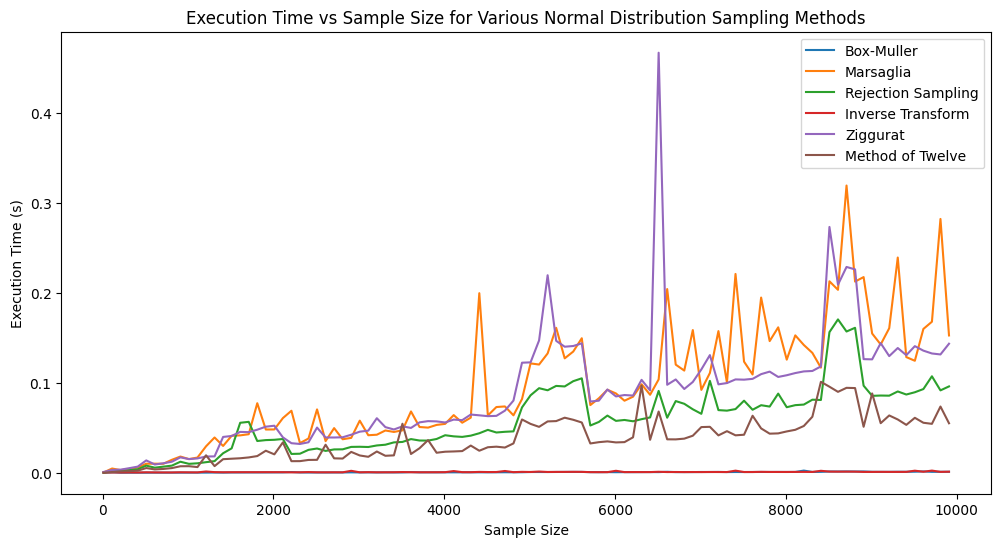

In [10]:
methods = {
    'Box-Muller': generate_box_muller_samples,
    'Marsaglia': generate_marsaglia_samples,
    'Rejection Sampling': generate_rejection_sampling_samples,
    'Inverse Transform': inverse_transform_sampling,
    'Ziggurat': generate_ziggurat_samples,
    'Method of Twelve': method_of_twelve
}
def measure_execution_times(sample_sizes) -> dict:
    """
    Measure the execution times for various sampling methods.

    Args:
        sample_sizes (Iterable[int]): Iterable of sample sizes to test.

    Returns:
        dict: Dictionary of execution times for each method.
              Keys are method names, values are lists of execution times for each sample size.
    """
    # Initialize a dictionary to store the times for each method
    times = {method: [] for method in methods}

    # Loop through each sample size
    for size in sample_sizes:
        for method_name, method in methods.items():
            # Record the start time
            start_time = time.time()
            # Generate samples
            method(size)
            # Record the end time
            end_time = time.time()
            # Calculate the elapsed time and store it
            times[method_name].append(end_time - start_time)

    return times

def plot_execution_times(times: dict, sample_sizes):
    """
    Plot the execution times for various sampling methods.

    Args:
        times (dict): Dictionary of execution times for each method.
                      Keys are method names, values are lists of execution times for each sample size.
        sample_sizes (Iterable[int]): Iterable of sample sizes tested.
    """
    plt.figure(figsize=(12, 6))

    # Plot execution times for each method
    for method_name, execution_times in times.items():
        plt.plot(sample_sizes, execution_times, label=method_name)

    plt.xlabel('Sample Size')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time vs Sample Size for Various Normal Distribution Sampling Methods')
    plt.legend()
    plt.show()


sample_sizes = range(10, 10001, 100)
times = measure_execution_times(sample_sizes)
plot_execution_times(times, sample_sizes)


### Wnioski
Każda z powyższych metod została sprawdzona i przetestowana pod względem poprawności oraz efektywności. Możemy wyciągnąć wnioski, że każda z tych metod skutecznie generuje rozkład normalny, z różną efektywnością. Wybór metody może zależeć od konkretnych wymagań zadania, na przykład wymagań dotyczących czasu obliczeń, dokładności lub prostoty implementacji.






